**Questions** -

1. The initial question I had was about the parameters. What did all of them describe? Most of the information was present on the data source but I had to google or refer to other sources for the rest of it.

2. Is there any relation between Months and Fires? Have hot summer months caused more fires than the rest due to global warming?

3. What is the maximum and average ISI and how is it dependent on FFMC?

4. Does a region with high DMC also have a high DC value?

5. Does day have any significance on wildfires?


**Quality of data** -
  * Missing Data
  * Outliers




In [ ]:
!pip install ucimlrepo
%matplotlib inline

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# fetch dataset
forest_fires = fetch_ucirepo(id=162)
# data (as pandas dataframes)
data = forest_fires.data.features

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


**Question 1.** The initial question I had was about the parameters. What did all of them describe? Most of the information was present on the data source but I had to google or refer to other sources for the rest of it.

**Answer 1.**
Here we have data for Forest Fires of Portugal where (reference https://www.frames.gov/documents/catalog/alexander_2004_s590-lesson-30_CFFDRS-overview-presentation.pdf and Chatgpt) -

  - "X" and "Y" define the spatial coordinate within the Montesinho park map: 1 to 9.

  - "month" defines the month, day defines the day of the fire which are categorical values.

  - "FFMC" - Fine Fuel Moisture Code - is a numeric rating of the moisture content of forest litter and fine fuels. High fire risk: ≥ 80.

  - "DMC" - Duff Moisture Code - is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code indicates fuel consumption in moderate duff layers and medium-size woody material. High fire risk: ≥ 30.

  - "DC" - Drought Code - is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs. High fire risk: ≥ 300.

  - "ISI" - Initial Spread Index -is a numeric rating of the expected rate of fire spread. It is based on FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI. Rapid fire spread when ISI > 10.

  - "temp" is the temp in that area

  - "RH" is the Relative Humidity

  - "wind" is the wind speed

  - "rain" is the Rain Scale


**Checking for missing data and outliers**

Let's analyze the quality of our data and find missing values and outliers.

**Missing Data**

In [ ]:
data.isna().value_counts()

,,,,,,,,,,,,count
X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,
False,False,False,False,False,False,False,False,False,False,False,False,517


Luckily there were no missing values we had to deal with.

Now Let's check if there are any outliers, we can do that by plotting boxplots. While visualizing the outliers we can also check if they make sense or are caused by data errors -

**Outliers**
- X and Y

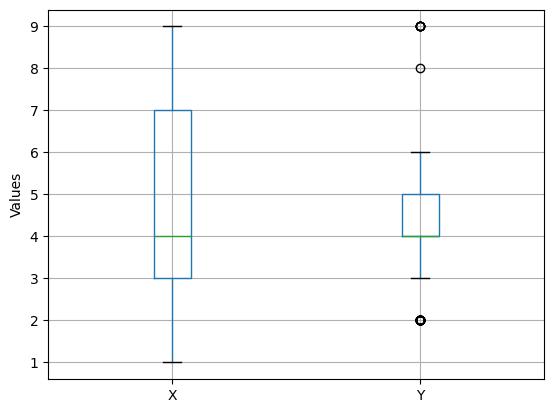

In [ ]:
data.boxplot(["X","Y"])
plt.ylabel("Values")
plt.show()

Y points are in range 1-9, so no need to update the data.

* "FFMC

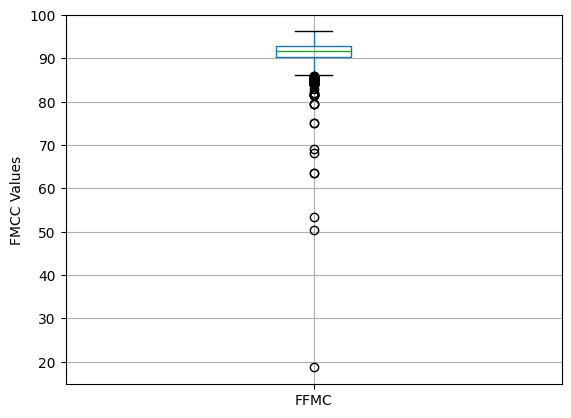

In [ ]:
data.boxplot(["FFMC"])
plt.ylabel("FMCC Values")
plt.show()

FFMC has its value greater than 0 and less than 101 which is standard range. (#Chatgpt for standard range)

* DMC and DC

  for DMC and DC the standard range starts for 0, so we would just have to check for -ve values. (#Chatgpt for standard range)

In [ ]:
data[(data["DMC"]<0) | (data["DC"]<0)]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain


As we dont have any -ve value for DMC and DC, we have clean data for them.

* ISI, temp, wind, RH and rain

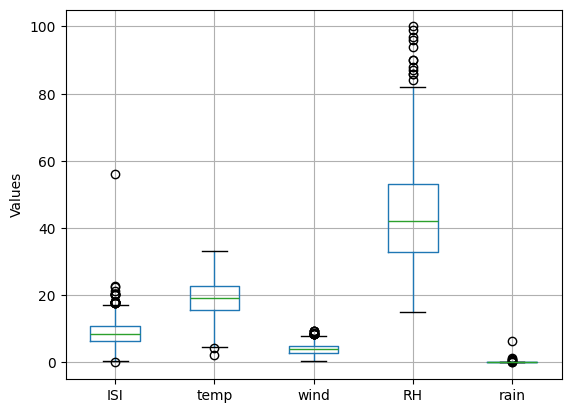

In [ ]:
data.boxplot(column=["ISI","temp","wind","RH","rain"])
plt.ylabel("Values")
plt.show()

ISI should be within 50 which maches our data set.(#Chatgpt for standard range - greater than 50 is highly unlikely)

There is no extra ordinary value for temp, wind, RH and rain.(#Chatgpt for standard range)

**Question 2.** Is there any relation between Months and Fires. Does Hot Summer Months have caused more fires than rest due to global warming ?

**Answer 2.**
- Lets check this by plotting bar graphs -

In [ ]:
count_months = data["month"].value_counts()
count_months

,count
month,
aug,184
sep,172
mar,54
jul,32
feb,20
jun,17
oct,15
apr,9
dec,9


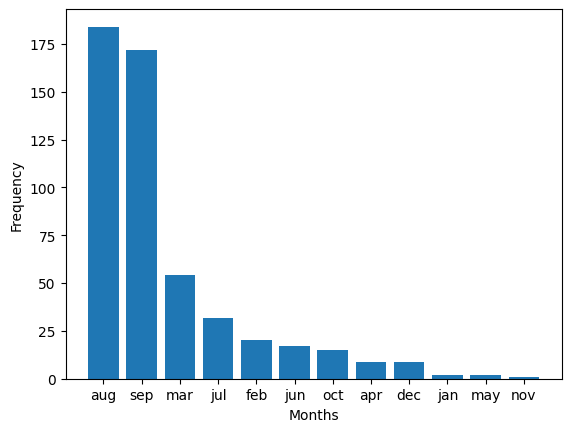

In [ ]:
plt.bar(count_months.keys(),count_months)
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

Looks like most of the fire started around the month of August and September which relates with summer season of Portugal (June - September) indicating hot weather.



**Question 3.** What is the maximum and average ISI and how is it dependant on FFMC and wind speed?

**Answer 3.**


To find this information lets plot ISI and visualize how the data is spread.

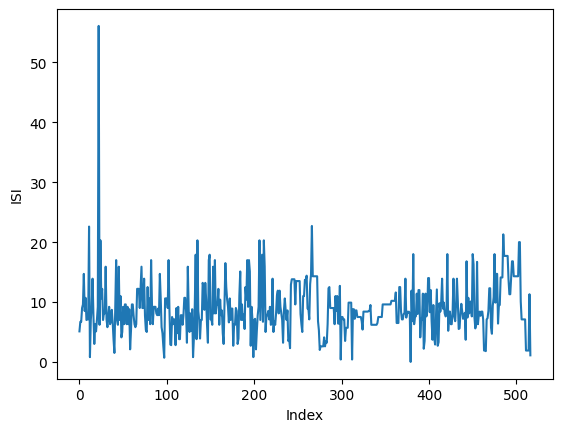

In [ ]:
plt.plot(data["ISI"])
plt.ylabel("ISI")
plt.xlabel("Index")

plt.show()

In [ ]:
data["ISI"].max()

56.1

In [ ]:
data["ISI"].mean()

9.021663442940039

Watching the plot I notice the spike which might be the maximum i am getting. Aside from that the second maximium is -

In [ ]:
data[data["ISI"]<56.1]["ISI"].max()

22.7

 Now lets see the relation between FFMC and ISI by plotting bar graphs.


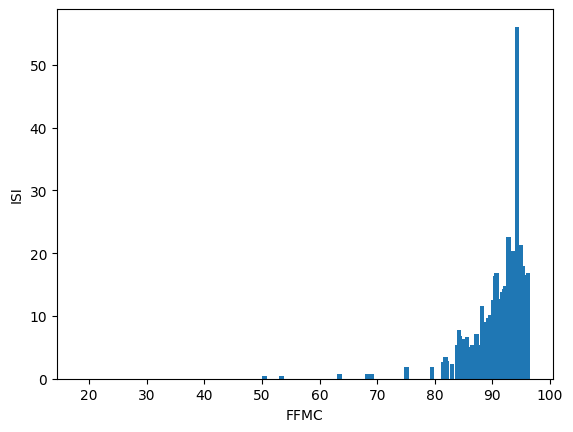

In [ ]:
plt.bar(data["FFMC"], data["ISI"])
plt.xlabel("FFMC")
plt.ylabel("ISI")
plt.show()

Looks like increase in FFMC is showing increase in ISI value which does makes sense.

**Question 4.** Does a region with a high DMC value also have a high DC?

**Answer 4.**
  To check this we can plot DMC vs DC graph and if it should upward trend then we would have a positive answer.

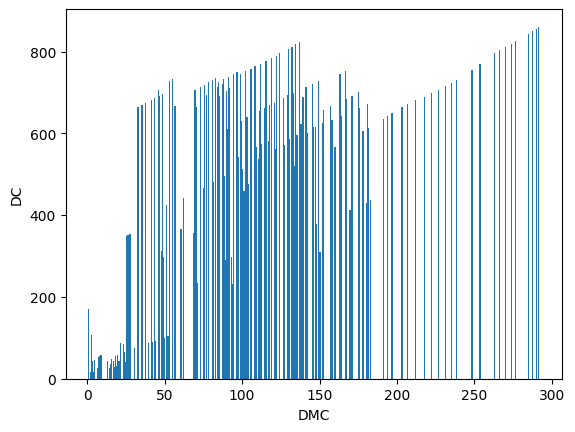

In [ ]:
plt.bar(data["DMC"],data["DC"])
plt.xlabel("DMC")
plt.ylabel("DC")
plt.show()

Even though its not very clear, but the graph does show upward trend to some extent.

**Question 5.** Does day have any significance on wildfires?

**Answer 5.**
Let's check the relevance of day on wildfires by getting the mean and standard deviation of days.

In [ ]:
count_days = data["day"].value_counts()
count_days

,count
day,
sun,95
fri,85
sat,84
mon,74
tue,64
thu,61
wed,54


In [ ]:
count_days.mean()

73.85714285714286

In [ ]:
count_days.std()

14.89327109165491

As mean and SD have huge gap in them that means the values are closely related and does not show any significance.

**Observation Summary**

  * Data was well maintained and clean.
  * Forest Fires are at high risk in the summer season which might be due to summers getting hotter due to global warming.
  * The higher the moisture content of forest litter and fine fuels higher the risk of fire spread.
  * The moisture content of loosely compacted organic layers below surface litter is higher in regions with higher deep, compact organic layers moisture levels.

*References*
1. UCI Dataset - https://archive.ics.uci.edu/dataset/162/forest+fire
2. Google
3. Chatgpt
4. https://www.frames.gov/documents/catalog/alexander_2004_s590-lesson-30_CFFDRS-overview-presentation.pdf